In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lib_neurips import error, create_K, sinkhorn_em_algorithm_single, em_algorithm_single
from scipy.special import logsumexp
from copy import deepcopy
import ot



In [4]:
## A symmetric GMM with 2 components in 1 dimensions
from time import time
N = 1000
Nc=2
d=1

mu = [1,-1]
n_iter = 200
n_iter_s = 25
n_iter_sinkhorn=200
mu0 = np.linspace(-2,2,26)
props = np.linspace(0.5,1,51)

#number of repetitions in experiment
nrep = 10
mu_final_em = np.zeros((len(mu0), len(props), nrep, n_iter))
mu_final_em_theta = np.zeros((len(mu0), len(props), nrep, n_iter))
mu_final_sinkhorn = np.zeros((len(mu0),len(props), nrep, n_iter_s))

theta_em = np.zeros((len(mu0), len(props),nrep,n_iter,2))

#sigma0 is the true variance, equal to the parametric model
sigma0=1.0
sigmaparameter = sigma0


for r in range(nrep):
    #define dataset
    X0 = np.sqrt(sigma0)*np.random.randn(N, 1).astype('float32')

    for p0 in range(len(props)): 

      
        prop = props[p0]
        X = deepcopy(X0)
        X[:int(N*prop), 0] += mu[0]
        X[int(N*prop):N, 0] += mu[1]

        prop = props[p0]
        theta0 = np.reshape(np.array([prop, 1-prop]), [Nc,1])



        log_theta = np.zeros((Nc,1))
        log_theta[0] = np.log(prop)
        log_theta[1] = np.log(1-prop)

        for n0 in range(len(mu0)):
            print([n0,p0])
            a=time()
            mu00  = np.reshape(np.array([mu0[n0], -mu0[n0]]), [Nc,1]).astype('float32')

            a,b,seq = em_algorithm_single(X, mu00, sigmaparameter, log_theta, n_iter=n_iter, update_theta=False)

            for n in range(n_iter):
                mu_final_em[n0,p0,r,n] = seq[n][0,0]


            a,b,seq = em_algorithm_single(X, mu00, sigmaparameter, log_theta, n_iter=n_iter, update_theta=True)

            for n in range(n_iter):
                mu_final_em_theta[n0,p0,r,n] = seq[n][0,0]
                theta_em[n0,p0,r,n,:]=b[n].flatten()

            a,theta0,seq=sinkhorn_em_algorithm_single(X, mu00, sigmaparameter, log_theta, n_iter=n_iter_s, n_iter_sinkhorn=200)
            for n in range(n_iter_s):
                mu_final_sinkhorn[n0,p0,r,n] = seq[n][0,0]




[0, 0]
[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 0]
[25, 0]
[0, 1]
[1, 1]
[2, 1]
[3, 1]
[4, 1]
[5, 1]
[6, 1]
[7, 1]
[8, 1]
[9, 1]
[10, 1]
[11, 1]
[12, 1]
[13, 1]
[14, 1]
[15, 1]
[16, 1]
[17, 1]
[18, 1]
[19, 1]
[20, 1]
[21, 1]
[22, 1]
[23, 1]
[24, 1]
[25, 1]
[0, 2]
[1, 2]
[2, 2]
[3, 2]
[4, 2]
[5, 2]
[6, 2]
[7, 2]
[8, 2]
[9, 2]
[10, 2]
[11, 2]
[12, 2]
[13, 2]
[14, 2]
[15, 2]
[16, 2]
[17, 2]
[18, 2]
[19, 2]
[20, 2]
[21, 2]
[22, 2]
[23, 2]
[24, 2]
[25, 2]
[0, 3]
[1, 3]
[2, 3]
[3, 3]
[4, 3]
[5, 3]
[6, 3]
[7, 3]
[8, 3]
[9, 3]
[10, 3]
[11, 3]
[12, 3]
[13, 3]
[14, 3]
[15, 3]
[16, 3]
[17, 3]
[18, 3]
[19, 3]
[20, 3]
[21, 3]
[22, 3]
[23, 3]
[24, 3]
[25, 3]
[0, 4]
[1, 4]
[2, 4]
[3, 4]
[4, 4]
[5, 4]
[6, 4]
[7, 4]
[8, 4]
[9, 4]
[10, 4]
[11, 4]
[12, 4]
[13, 4]
[14, 4]
[15, 4]
[16, 4]
[17, 4]
[18, 4]
[19, 4]
[20, 4]
[21, 4]
[22, 4]
[23, 4]
[24, 4]
[25, 4]
[0, 5]
[1,

[20, 37]
[21, 37]
[22, 37]
[23, 37]
[24, 37]
[25, 37]
[0, 38]
[1, 38]
[2, 38]
[3, 38]
[4, 38]
[5, 38]
[6, 38]
[7, 38]
[8, 38]
[9, 38]
[10, 38]
[11, 38]
[12, 38]
[13, 38]
[14, 38]
[15, 38]
[16, 38]
[17, 38]
[18, 38]
[19, 38]
[20, 38]
[21, 38]
[22, 38]
[23, 38]
[24, 38]
[25, 38]
[0, 39]
[1, 39]
[2, 39]
[3, 39]
[4, 39]
[5, 39]
[6, 39]
[7, 39]
[8, 39]
[9, 39]
[10, 39]
[11, 39]
[12, 39]
[13, 39]
[14, 39]
[15, 39]
[16, 39]
[17, 39]
[18, 39]
[19, 39]
[20, 39]
[21, 39]
[22, 39]
[23, 39]
[24, 39]
[25, 39]
[0, 40]
[1, 40]
[2, 40]
[3, 40]
[4, 40]
[5, 40]
[6, 40]
[7, 40]
[8, 40]
[9, 40]
[10, 40]
[11, 40]
[12, 40]
[13, 40]
[14, 40]
[15, 40]
[16, 40]
[17, 40]
[18, 40]
[19, 40]
[20, 40]
[21, 40]
[22, 40]
[23, 40]
[24, 40]
[25, 40]
[0, 41]
[1, 41]
[2, 41]
[3, 41]
[4, 41]
[5, 41]
[6, 41]
[7, 41]
[8, 41]
[9, 41]
[10, 41]
[11, 41]
[12, 41]
[13, 41]
[14, 41]
[15, 41]
[16, 41]
[17, 41]
[18, 41]
[19, 41]
[20, 41]
[21, 41]
[22, 41]
[23, 41]
[24, 41]
[25, 41]
[0, 42]
[1, 42]
[2, 42]
[3, 42]
[4, 42]
[5, 42]
[6

/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log
/Users/gonzalomena/Documents/sinkhorn_estimation/code/lib_neurips.py:38: RuntimeWarning: divide by zero encountered in log
  log_theta0 = np.log(theta0)
/Users/gonzalomena/Documents/sinkhorn_estimation/code/lib_neurips.py:78: RuntimeWarning: divide by zero encountered in log
  u = eps * (np.log(mu_x) - logsumexp(M, axis=1)) + u
/Users/gonzalomena/Documents/sinkhorn_estimation/code/lib_neurips.py:78: RuntimeWarning: invalid value encountered in subtract
  u = eps * (np.log(mu_x) - logsumexp(M, axis=1)) + u
/Users/gonzalomena/Documents/sinkhorn_estimation/code/lib_neurips.py:82: RuntimeWarning: divide by zero encountered in log
  u = eps * (np.log(mu_x) - logsumexp(M, axis=1)) + u


[0, 50]
[1, 50]
[2, 50]
[3, 50]
[4, 50]
[5, 50]
[6, 50]
[7, 50]
[8, 50]
[9, 50]
[10, 50]
[11, 50]
[12, 50]
[13, 50]
[14, 50]
[15, 50]
[16, 50]
[17, 50]
[18, 50]
[19, 50]
[20, 50]
[21, 50]
[22, 50]
[23, 50]
[24, 50]
[25, 50]
[0, 0]
[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 0]
[25, 0]
[0, 1]
[1, 1]
[2, 1]
[3, 1]
[4, 1]
[5, 1]
[6, 1]
[7, 1]
[8, 1]
[9, 1]
[10, 1]
[11, 1]
[12, 1]
[13, 1]
[14, 1]
[15, 1]
[16, 1]
[17, 1]
[18, 1]
[19, 1]
[20, 1]
[21, 1]
[22, 1]
[23, 1]
[24, 1]
[25, 1]
[0, 2]
[1, 2]
[2, 2]
[3, 2]
[4, 2]
[5, 2]
[6, 2]
[7, 2]
[8, 2]
[9, 2]
[10, 2]
[11, 2]
[12, 2]
[13, 2]
[14, 2]
[15, 2]
[16, 2]
[17, 2]
[18, 2]
[19, 2]
[20, 2]
[21, 2]
[22, 2]
[23, 2]
[24, 2]
[25, 2]
[0, 3]
[1, 3]
[2, 3]
[3, 3]
[4, 3]
[5, 3]
[6, 3]
[7, 3]
[8, 3]
[9, 3]
[10, 3]
[11, 3]
[12, 3]
[13, 3]
[14, 3]
[15, 3]
[16, 3]
[17, 3]
[18, 3]
[19, 3]
[20, 3]
[21, 3]
[22, 3]
[23, 3]


[20, 36]
[21, 36]
[22, 36]
[23, 36]
[24, 36]
[25, 36]
[0, 37]
[1, 37]
[2, 37]
[3, 37]
[4, 37]
[5, 37]
[6, 37]
[7, 37]
[8, 37]
[9, 37]
[10, 37]
[11, 37]
[12, 37]
[13, 37]
[14, 37]
[15, 37]
[16, 37]
[17, 37]
[18, 37]
[19, 37]
[20, 37]
[21, 37]
[22, 37]
[23, 37]
[24, 37]
[25, 37]
[0, 38]
[1, 38]
[2, 38]
[3, 38]
[4, 38]
[5, 38]
[6, 38]
[7, 38]
[8, 38]
[9, 38]
[10, 38]
[11, 38]
[12, 38]
[13, 38]
[14, 38]
[15, 38]
[16, 38]
[17, 38]
[18, 38]
[19, 38]
[20, 38]
[21, 38]
[22, 38]
[23, 38]
[24, 38]
[25, 38]
[0, 39]
[1, 39]
[2, 39]
[3, 39]
[4, 39]
[5, 39]
[6, 39]
[7, 39]
[8, 39]
[9, 39]
[10, 39]
[11, 39]
[12, 39]
[13, 39]
[14, 39]
[15, 39]
[16, 39]
[17, 39]
[18, 39]
[19, 39]
[20, 39]
[21, 39]
[22, 39]
[23, 39]
[24, 39]
[25, 39]
[0, 40]
[1, 40]
[2, 40]
[3, 40]
[4, 40]
[5, 40]
[6, 40]
[7, 40]
[8, 40]
[9, 40]
[10, 40]
[11, 40]
[12, 40]
[13, 40]
[14, 40]
[15, 40]
[16, 40]
[17, 40]
[18, 40]
[19, 40]
[20, 40]
[21, 40]
[22, 40]
[23, 40]
[24, 40]
[25, 40]
[0, 41]
[1, 41]
[2, 41]
[3, 41]
[4, 41]
[5, 41]
[6

[14, 23]
[15, 23]
[16, 23]
[17, 23]
[18, 23]
[19, 23]
[20, 23]
[21, 23]
[22, 23]
[23, 23]
[24, 23]
[25, 23]
[0, 24]
[1, 24]
[2, 24]
[3, 24]
[4, 24]
[5, 24]
[6, 24]
[7, 24]
[8, 24]
[9, 24]
[10, 24]
[11, 24]
[12, 24]
[13, 24]
[14, 24]
[15, 24]
[16, 24]
[17, 24]
[18, 24]
[19, 24]
[20, 24]
[21, 24]
[22, 24]
[23, 24]
[24, 24]
[25, 24]
[0, 25]
[1, 25]
[2, 25]
[3, 25]
[4, 25]
[5, 25]
[6, 25]
[7, 25]
[8, 25]
[9, 25]
[10, 25]
[11, 25]
[12, 25]
[13, 25]
[14, 25]
[15, 25]
[16, 25]
[17, 25]
[18, 25]
[19, 25]
[20, 25]
[21, 25]
[22, 25]
[23, 25]
[24, 25]
[25, 25]
[0, 26]
[1, 26]
[2, 26]
[3, 26]
[4, 26]
[5, 26]
[6, 26]
[7, 26]
[8, 26]
[9, 26]
[10, 26]
[11, 26]
[12, 26]
[13, 26]
[14, 26]
[15, 26]
[16, 26]
[17, 26]
[18, 26]
[19, 26]
[20, 26]
[21, 26]
[22, 26]
[23, 26]
[24, 26]
[25, 26]
[0, 27]
[1, 27]
[2, 27]
[3, 27]
[4, 27]
[5, 27]
[6, 27]
[7, 27]
[8, 27]
[9, 27]
[10, 27]
[11, 27]
[12, 27]
[13, 27]
[14, 27]
[15, 27]
[16, 27]
[17, 27]
[18, 27]
[19, 27]
[20, 27]
[21, 27]
[22, 27]
[23, 27]
[24, 27]
[25, 

[8, 10]
[9, 10]
[10, 10]
[11, 10]
[12, 10]
[13, 10]
[14, 10]
[15, 10]
[16, 10]
[17, 10]
[18, 10]
[19, 10]
[20, 10]
[21, 10]
[22, 10]
[23, 10]
[24, 10]
[25, 10]
[0, 11]
[1, 11]
[2, 11]
[3, 11]
[4, 11]
[5, 11]
[6, 11]
[7, 11]
[8, 11]
[9, 11]
[10, 11]
[11, 11]
[12, 11]
[13, 11]
[14, 11]
[15, 11]
[16, 11]
[17, 11]
[18, 11]
[19, 11]
[20, 11]
[21, 11]
[22, 11]
[23, 11]
[24, 11]
[25, 11]
[0, 12]
[1, 12]
[2, 12]
[3, 12]
[4, 12]
[5, 12]
[6, 12]
[7, 12]
[8, 12]
[9, 12]
[10, 12]
[11, 12]
[12, 12]
[13, 12]
[14, 12]
[15, 12]
[16, 12]
[17, 12]
[18, 12]
[19, 12]
[20, 12]
[21, 12]
[22, 12]
[23, 12]
[24, 12]
[25, 12]
[0, 13]
[1, 13]
[2, 13]
[3, 13]
[4, 13]
[5, 13]
[6, 13]
[7, 13]
[8, 13]
[9, 13]
[10, 13]
[11, 13]
[12, 13]
[13, 13]
[14, 13]
[15, 13]
[16, 13]
[17, 13]
[18, 13]
[19, 13]
[20, 13]
[21, 13]
[22, 13]
[23, 13]
[24, 13]
[25, 13]
[0, 14]
[1, 14]
[2, 14]
[3, 14]
[4, 14]
[5, 14]
[6, 14]
[7, 14]
[8, 14]
[9, 14]
[10, 14]
[11, 14]
[12, 14]
[13, 14]
[14, 14]
[15, 14]
[16, 14]
[17, 14]
[18, 14]
[19, 14

[23, 46]
[24, 46]
[25, 46]
[0, 47]
[1, 47]
[2, 47]
[3, 47]
[4, 47]
[5, 47]
[6, 47]
[7, 47]
[8, 47]
[9, 47]
[10, 47]
[11, 47]
[12, 47]
[13, 47]
[14, 47]
[15, 47]
[16, 47]
[17, 47]
[18, 47]
[19, 47]
[20, 47]
[21, 47]
[22, 47]
[23, 47]
[24, 47]
[25, 47]
[0, 48]
[1, 48]
[2, 48]
[3, 48]
[4, 48]
[5, 48]
[6, 48]
[7, 48]
[8, 48]
[9, 48]
[10, 48]
[11, 48]
[12, 48]
[13, 48]
[14, 48]
[15, 48]
[16, 48]
[17, 48]
[18, 48]
[19, 48]
[20, 48]
[21, 48]
[22, 48]
[23, 48]
[24, 48]
[25, 48]
[0, 49]
[1, 49]
[2, 49]
[3, 49]
[4, 49]
[5, 49]
[6, 49]
[7, 49]
[8, 49]
[9, 49]
[10, 49]
[11, 49]
[12, 49]
[13, 49]
[14, 49]
[15, 49]
[16, 49]
[17, 49]
[18, 49]
[19, 49]
[20, 49]
[21, 49]
[22, 49]
[23, 49]
[24, 49]
[25, 49]
[0, 50]
[1, 50]
[2, 50]
[3, 50]
[4, 50]
[5, 50]
[6, 50]
[7, 50]
[8, 50]
[9, 50]
[10, 50]
[11, 50]
[12, 50]
[13, 50]
[14, 50]
[15, 50]
[16, 50]
[17, 50]
[18, 50]
[19, 50]
[20, 50]
[21, 50]
[22, 50]
[23, 50]
[24, 50]
[25, 50]
[0, 0]
[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]

[17, 33]
[18, 33]
[19, 33]
[20, 33]
[21, 33]
[22, 33]
[23, 33]
[24, 33]
[25, 33]
[0, 34]
[1, 34]
[2, 34]
[3, 34]
[4, 34]
[5, 34]
[6, 34]
[7, 34]
[8, 34]
[9, 34]
[10, 34]
[11, 34]
[12, 34]
[13, 34]
[14, 34]
[15, 34]
[16, 34]
[17, 34]
[18, 34]
[19, 34]
[20, 34]
[21, 34]
[22, 34]
[23, 34]
[24, 34]
[25, 34]
[0, 35]
[1, 35]
[2, 35]
[3, 35]
[4, 35]
[5, 35]
[6, 35]
[7, 35]
[8, 35]
[9, 35]
[10, 35]
[11, 35]
[12, 35]
[13, 35]
[14, 35]
[15, 35]
[16, 35]
[17, 35]
[18, 35]
[19, 35]
[20, 35]
[21, 35]
[22, 35]
[23, 35]
[24, 35]
[25, 35]
[0, 36]
[1, 36]
[2, 36]
[3, 36]
[4, 36]
[5, 36]
[6, 36]
[7, 36]
[8, 36]
[9, 36]
[10, 36]
[11, 36]
[12, 36]
[13, 36]
[14, 36]
[15, 36]
[16, 36]
[17, 36]
[18, 36]
[19, 36]
[20, 36]
[21, 36]
[22, 36]
[23, 36]
[24, 36]
[25, 36]
[0, 37]
[1, 37]
[2, 37]
[3, 37]
[4, 37]
[5, 37]
[6, 37]
[7, 37]
[8, 37]
[9, 37]
[10, 37]
[11, 37]
[12, 37]
[13, 37]
[14, 37]
[15, 37]
[16, 37]
[17, 37]
[18, 37]
[19, 37]
[20, 37]
[21, 37]
[22, 37]
[23, 37]
[24, 37]
[25, 37]
[0, 38]
[1, 38]
[2, 38]

[11, 20]
[12, 20]
[13, 20]
[14, 20]
[15, 20]
[16, 20]
[17, 20]
[18, 20]
[19, 20]
[20, 20]
[21, 20]
[22, 20]
[23, 20]
[24, 20]
[25, 20]
[0, 21]
[1, 21]
[2, 21]
[3, 21]
[4, 21]
[5, 21]
[6, 21]
[7, 21]
[8, 21]
[9, 21]
[10, 21]
[11, 21]
[12, 21]
[13, 21]
[14, 21]
[15, 21]
[16, 21]
[17, 21]
[18, 21]
[19, 21]
[20, 21]
[21, 21]
[22, 21]
[23, 21]
[24, 21]
[25, 21]
[0, 22]
[1, 22]
[2, 22]
[3, 22]
[4, 22]
[5, 22]
[6, 22]
[7, 22]
[8, 22]
[9, 22]
[10, 22]
[11, 22]
[12, 22]
[13, 22]
[14, 22]
[15, 22]
[16, 22]
[17, 22]
[18, 22]
[19, 22]
[20, 22]
[21, 22]
[22, 22]
[23, 22]
[24, 22]
[25, 22]
[0, 23]
[1, 23]
[2, 23]
[3, 23]
[4, 23]
[5, 23]
[6, 23]
[7, 23]
[8, 23]
[9, 23]
[10, 23]
[11, 23]
[12, 23]
[13, 23]
[14, 23]
[15, 23]
[16, 23]
[17, 23]
[18, 23]
[19, 23]
[20, 23]
[21, 23]
[22, 23]
[23, 23]
[24, 23]
[25, 23]
[0, 24]
[1, 24]
[2, 24]
[3, 24]
[4, 24]
[5, 24]
[6, 24]
[7, 24]
[8, 24]
[9, 24]
[10, 24]
[11, 24]
[12, 24]
[13, 24]
[14, 24]
[15, 24]
[16, 24]
[17, 24]
[18, 24]
[19, 24]
[20, 24]
[21, 24]
[22, 

[20, 6]
[21, 6]
[22, 6]
[23, 6]
[24, 6]
[25, 6]
[0, 7]
[1, 7]
[2, 7]
[3, 7]
[4, 7]
[5, 7]
[6, 7]
[7, 7]
[8, 7]
[9, 7]
[10, 7]
[11, 7]
[12, 7]
[13, 7]
[14, 7]
[15, 7]
[16, 7]
[17, 7]
[18, 7]
[19, 7]
[20, 7]
[21, 7]
[22, 7]
[23, 7]
[24, 7]
[25, 7]
[0, 8]
[1, 8]
[2, 8]
[3, 8]
[4, 8]
[5, 8]
[6, 8]
[7, 8]
[8, 8]
[9, 8]
[10, 8]
[11, 8]
[12, 8]
[13, 8]
[14, 8]
[15, 8]
[16, 8]
[17, 8]
[18, 8]
[19, 8]
[20, 8]
[21, 8]
[22, 8]
[23, 8]
[24, 8]
[25, 8]
[0, 9]
[1, 9]
[2, 9]
[3, 9]
[4, 9]
[5, 9]
[6, 9]
[7, 9]
[8, 9]
[9, 9]
[10, 9]
[11, 9]
[12, 9]
[13, 9]
[14, 9]
[15, 9]
[16, 9]
[17, 9]
[18, 9]
[19, 9]
[20, 9]
[21, 9]
[22, 9]
[23, 9]
[24, 9]
[25, 9]
[0, 10]
[1, 10]
[2, 10]
[3, 10]
[4, 10]
[5, 10]
[6, 10]
[7, 10]
[8, 10]
[9, 10]
[10, 10]
[11, 10]
[12, 10]
[13, 10]
[14, 10]
[15, 10]
[16, 10]
[17, 10]
[18, 10]
[19, 10]
[20, 10]
[21, 10]
[22, 10]
[23, 10]
[24, 10]
[25, 10]
[0, 11]
[1, 11]
[2, 11]
[3, 11]
[4, 11]
[5, 11]
[6, 11]
[7, 11]
[8, 11]
[9, 11]
[10, 11]
[11, 11]
[12, 11]
[13, 11]
[14, 11]
[15, 11]


[19, 43]
[20, 43]
[21, 43]
[22, 43]
[23, 43]
[24, 43]
[25, 43]
[0, 44]
[1, 44]
[2, 44]
[3, 44]
[4, 44]
[5, 44]
[6, 44]
[7, 44]
[8, 44]
[9, 44]
[10, 44]
[11, 44]
[12, 44]
[13, 44]
[14, 44]
[15, 44]
[16, 44]
[17, 44]
[18, 44]
[19, 44]
[20, 44]
[21, 44]
[22, 44]
[23, 44]
[24, 44]
[25, 44]
[0, 45]
[1, 45]
[2, 45]
[3, 45]
[4, 45]
[5, 45]
[6, 45]
[7, 45]
[8, 45]
[9, 45]
[10, 45]
[11, 45]
[12, 45]
[13, 45]
[14, 45]
[15, 45]
[16, 45]
[17, 45]
[18, 45]
[19, 45]
[20, 45]
[21, 45]
[22, 45]
[23, 45]
[24, 45]
[25, 45]
[0, 46]
[1, 46]
[2, 46]
[3, 46]
[4, 46]
[5, 46]
[6, 46]
[7, 46]
[8, 46]
[9, 46]
[10, 46]
[11, 46]
[12, 46]
[13, 46]
[14, 46]
[15, 46]
[16, 46]
[17, 46]
[18, 46]
[19, 46]
[20, 46]
[21, 46]
[22, 46]
[23, 46]
[24, 46]
[25, 46]
[0, 47]
[1, 47]
[2, 47]
[3, 47]
[4, 47]
[5, 47]
[6, 47]
[7, 47]
[8, 47]
[9, 47]
[10, 47]
[11, 47]
[12, 47]
[13, 47]
[14, 47]
[15, 47]
[16, 47]
[17, 47]
[18, 47]
[19, 47]
[20, 47]
[21, 47]
[22, 47]
[23, 47]
[24, 47]
[25, 47]
[0, 48]
[1, 48]
[2, 48]
[3, 48]
[4, 48]
[

[13, 30]
[14, 30]
[15, 30]
[16, 30]
[17, 30]
[18, 30]
[19, 30]
[20, 30]
[21, 30]
[22, 30]
[23, 30]
[24, 30]
[25, 30]
[0, 31]
[1, 31]
[2, 31]
[3, 31]
[4, 31]
[5, 31]
[6, 31]
[7, 31]
[8, 31]
[9, 31]
[10, 31]
[11, 31]
[12, 31]
[13, 31]
[14, 31]
[15, 31]
[16, 31]
[17, 31]
[18, 31]
[19, 31]
[20, 31]
[21, 31]
[22, 31]
[23, 31]
[24, 31]
[25, 31]
[0, 32]
[1, 32]
[2, 32]
[3, 32]
[4, 32]
[5, 32]
[6, 32]
[7, 32]
[8, 32]
[9, 32]
[10, 32]
[11, 32]
[12, 32]
[13, 32]
[14, 32]
[15, 32]
[16, 32]
[17, 32]
[18, 32]
[19, 32]
[20, 32]
[21, 32]
[22, 32]
[23, 32]
[24, 32]
[25, 32]
[0, 33]
[1, 33]
[2, 33]
[3, 33]
[4, 33]
[5, 33]
[6, 33]
[7, 33]
[8, 33]
[9, 33]
[10, 33]
[11, 33]
[12, 33]
[13, 33]
[14, 33]
[15, 33]
[16, 33]
[17, 33]
[18, 33]
[19, 33]
[20, 33]
[21, 33]
[22, 33]
[23, 33]
[24, 33]
[25, 33]
[0, 34]
[1, 34]
[2, 34]
[3, 34]
[4, 34]
[5, 34]
[6, 34]
[7, 34]
[8, 34]
[9, 34]
[10, 34]
[11, 34]
[12, 34]
[13, 34]
[14, 34]
[15, 34]
[16, 34]
[17, 34]
[18, 34]
[19, 34]
[20, 34]
[21, 34]
[22, 34]
[23, 34]
[24, 

[6, 17]
[7, 17]
[8, 17]
[9, 17]
[10, 17]
[11, 17]
[12, 17]
[13, 17]
[14, 17]
[15, 17]
[16, 17]
[17, 17]
[18, 17]
[19, 17]
[20, 17]
[21, 17]
[22, 17]
[23, 17]
[24, 17]
[25, 17]
[0, 18]
[1, 18]
[2, 18]
[3, 18]
[4, 18]
[5, 18]
[6, 18]
[7, 18]
[8, 18]
[9, 18]
[10, 18]
[11, 18]
[12, 18]
[13, 18]
[14, 18]
[15, 18]
[16, 18]
[17, 18]
[18, 18]
[19, 18]
[20, 18]
[21, 18]
[22, 18]
[23, 18]
[24, 18]
[25, 18]
[0, 19]
[1, 19]
[2, 19]
[3, 19]
[4, 19]
[5, 19]
[6, 19]
[7, 19]
[8, 19]
[9, 19]
[10, 19]
[11, 19]
[12, 19]
[13, 19]
[14, 19]
[15, 19]
[16, 19]
[17, 19]
[18, 19]
[19, 19]
[20, 19]
[21, 19]
[22, 19]
[23, 19]
[24, 19]
[25, 19]
[0, 20]
[1, 20]
[2, 20]
[3, 20]
[4, 20]
[5, 20]
[6, 20]
[7, 20]
[8, 20]
[9, 20]
[10, 20]
[11, 20]
[12, 20]
[13, 20]
[14, 20]
[15, 20]
[16, 20]
[17, 20]
[18, 20]
[19, 20]
[20, 20]
[21, 20]
[22, 20]
[23, 20]
[24, 20]
[25, 20]
[0, 21]
[1, 21]
[2, 21]
[3, 21]
[4, 21]
[5, 21]
[6, 21]
[7, 21]
[8, 21]
[9, 21]
[10, 21]
[11, 21]
[12, 21]
[13, 21]
[14, 21]
[15, 21]
[16, 21]
[17, 21]


[5, 3]
[6, 3]
[7, 3]
[8, 3]
[9, 3]
[10, 3]
[11, 3]
[12, 3]
[13, 3]
[14, 3]
[15, 3]
[16, 3]
[17, 3]
[18, 3]
[19, 3]
[20, 3]
[21, 3]
[22, 3]
[23, 3]
[24, 3]
[25, 3]
[0, 4]
[1, 4]
[2, 4]
[3, 4]
[4, 4]
[5, 4]
[6, 4]
[7, 4]
[8, 4]
[9, 4]
[10, 4]
[11, 4]
[12, 4]
[13, 4]
[14, 4]
[15, 4]
[16, 4]
[17, 4]
[18, 4]
[19, 4]
[20, 4]
[21, 4]
[22, 4]
[23, 4]
[24, 4]
[25, 4]
[0, 5]
[1, 5]
[2, 5]
[3, 5]
[4, 5]
[5, 5]
[6, 5]
[7, 5]
[8, 5]
[9, 5]
[10, 5]
[11, 5]
[12, 5]
[13, 5]
[14, 5]
[15, 5]
[16, 5]
[17, 5]
[18, 5]
[19, 5]
[20, 5]
[21, 5]
[22, 5]
[23, 5]
[24, 5]
[25, 5]
[0, 6]
[1, 6]
[2, 6]
[3, 6]
[4, 6]
[5, 6]
[6, 6]
[7, 6]
[8, 6]
[9, 6]
[10, 6]
[11, 6]
[12, 6]
[13, 6]
[14, 6]
[15, 6]
[16, 6]
[17, 6]
[18, 6]
[19, 6]
[20, 6]
[21, 6]
[22, 6]
[23, 6]
[24, 6]
[25, 6]
[0, 7]
[1, 7]
[2, 7]
[3, 7]
[4, 7]
[5, 7]
[6, 7]
[7, 7]
[8, 7]
[9, 7]
[10, 7]
[11, 7]
[12, 7]
[13, 7]
[14, 7]
[15, 7]
[16, 7]
[17, 7]
[18, 7]
[19, 7]
[20, 7]
[21, 7]
[22, 7]
[23, 7]
[24, 7]
[25, 7]
[0, 8]
[1, 8]
[2, 8]
[3, 8]
[4, 8]
[5, 8]
[6,

[15, 40]
[16, 40]
[17, 40]
[18, 40]
[19, 40]
[20, 40]
[21, 40]
[22, 40]
[23, 40]
[24, 40]
[25, 40]
[0, 41]
[1, 41]
[2, 41]
[3, 41]
[4, 41]
[5, 41]
[6, 41]
[7, 41]
[8, 41]
[9, 41]
[10, 41]
[11, 41]
[12, 41]
[13, 41]
[14, 41]
[15, 41]
[16, 41]
[17, 41]
[18, 41]
[19, 41]
[20, 41]
[21, 41]
[22, 41]
[23, 41]
[24, 41]
[25, 41]
[0, 42]
[1, 42]
[2, 42]
[3, 42]
[4, 42]
[5, 42]
[6, 42]
[7, 42]
[8, 42]
[9, 42]
[10, 42]
[11, 42]
[12, 42]
[13, 42]
[14, 42]
[15, 42]
[16, 42]
[17, 42]
[18, 42]
[19, 42]
[20, 42]
[21, 42]
[22, 42]
[23, 42]
[24, 42]
[25, 42]
[0, 43]
[1, 43]
[2, 43]
[3, 43]
[4, 43]
[5, 43]
[6, 43]
[7, 43]
[8, 43]
[9, 43]
[10, 43]
[11, 43]
[12, 43]
[13, 43]
[14, 43]
[15, 43]
[16, 43]
[17, 43]
[18, 43]
[19, 43]
[20, 43]
[21, 43]
[22, 43]
[23, 43]
[24, 43]
[25, 43]
[0, 44]
[1, 44]
[2, 44]
[3, 44]
[4, 44]
[5, 44]
[6, 44]
[7, 44]
[8, 44]
[9, 44]
[10, 44]
[11, 44]
[12, 44]
[13, 44]
[14, 44]
[15, 44]
[16, 44]
[17, 44]
[18, 44]
[19, 44]
[20, 44]
[21, 44]
[22, 44]
[23, 44]
[24, 44]
[25, 44]
[0, 4

In [5]:
#Compute metrics
Nc = 2
niter = -1
m0=0
p0=1

mu0list=mu0
#n_iter = 200
#wasserstein distance
dist_em = np.zeros((len(mu0list), len(props), nrep, n_iter))
dist_em_theta = np.zeros((len(mu0list), len(props), nrep, n_iter))
dist_sinkhorn = np.zeros((len(mu0list), len(props), nrep, n_iter_s))

#distance from xu et al, 2018
dist_em2 = np.zeros((len(mu0list), len(props), nrep, n_iter))
dist_em_theta2 = np.zeros((len(mu0list), len(props), nrep, n_iter))
dist_sinkhorn2 = np.zeros((len(mu0list), len(props), nrep, n_iter_s))
thetas = np.zeros(2)
for r in range(nrep):
    for p0 in range(len(props)):
        thetas[0] = props[p0]
        thetas[1] = 1-props[p0]
        for m0 in range(len(mu0list)):
            for n in range(n_iter):
                mu2 = np.zeros((2,1))
                mu2[0] = mu_final_em[m0,p0,r,n]
                mu2[1] = -mu_final_em[m0,p0,r,n]

                dist_em[m0, p0, r, n]=ot.emd2(thetas, thetas, create_K(mu2, np.reshape(mu, [Nc,1])))
                dist_em2[m0, p0, r,n]= error(np.reshape(mu2, [Nc,1]), np.reshape(mu, [Nc,1]), thetas)

                
                mu2 = np.zeros((2,1))
                mu2[0] = mu_final_em_theta[m0,p0,r,n]
                mu2[1] = -mu_final_em_theta[m0,p0,r,n]
                dist_em_theta[m0, p0, r,n]=ot.emd2(theta_em[m0,p0,r,n], thetas, create_K(mu2, np.reshape(mu, [Nc,1])))
                dist_em_theta2[m0, p0, r,n]=error(np.reshape(mu2, [Nc,1]), np.reshape(mu, [Nc,1]), thetas)
            
            for n in range(n_iter_s):
                mu2 = np.zeros((2,1))
                mu2[0] = mu_final_sinkhorn[m0,p0,r,n]
                mu2[1] = -mu_final_sinkhorn[m0,p0,r,n]
                dist_sinkhorn[m0, p0, r,n]=ot.emd2(thetas, thetas, create_K(mu2, np.reshape(mu, [Nc,1])))
                dist_sinkhorn2[m0, p0, r,n]=error(np.reshape(mu2, [Nc,1]), np.reshape(mu, [Nc,1]), thetas)


/Users/gonzalomena/anaconda3/lib/python3.7/site-packages/ot/lp/__init__.py:230: UserWarning: Problem unbounded
  check_result(result_code)


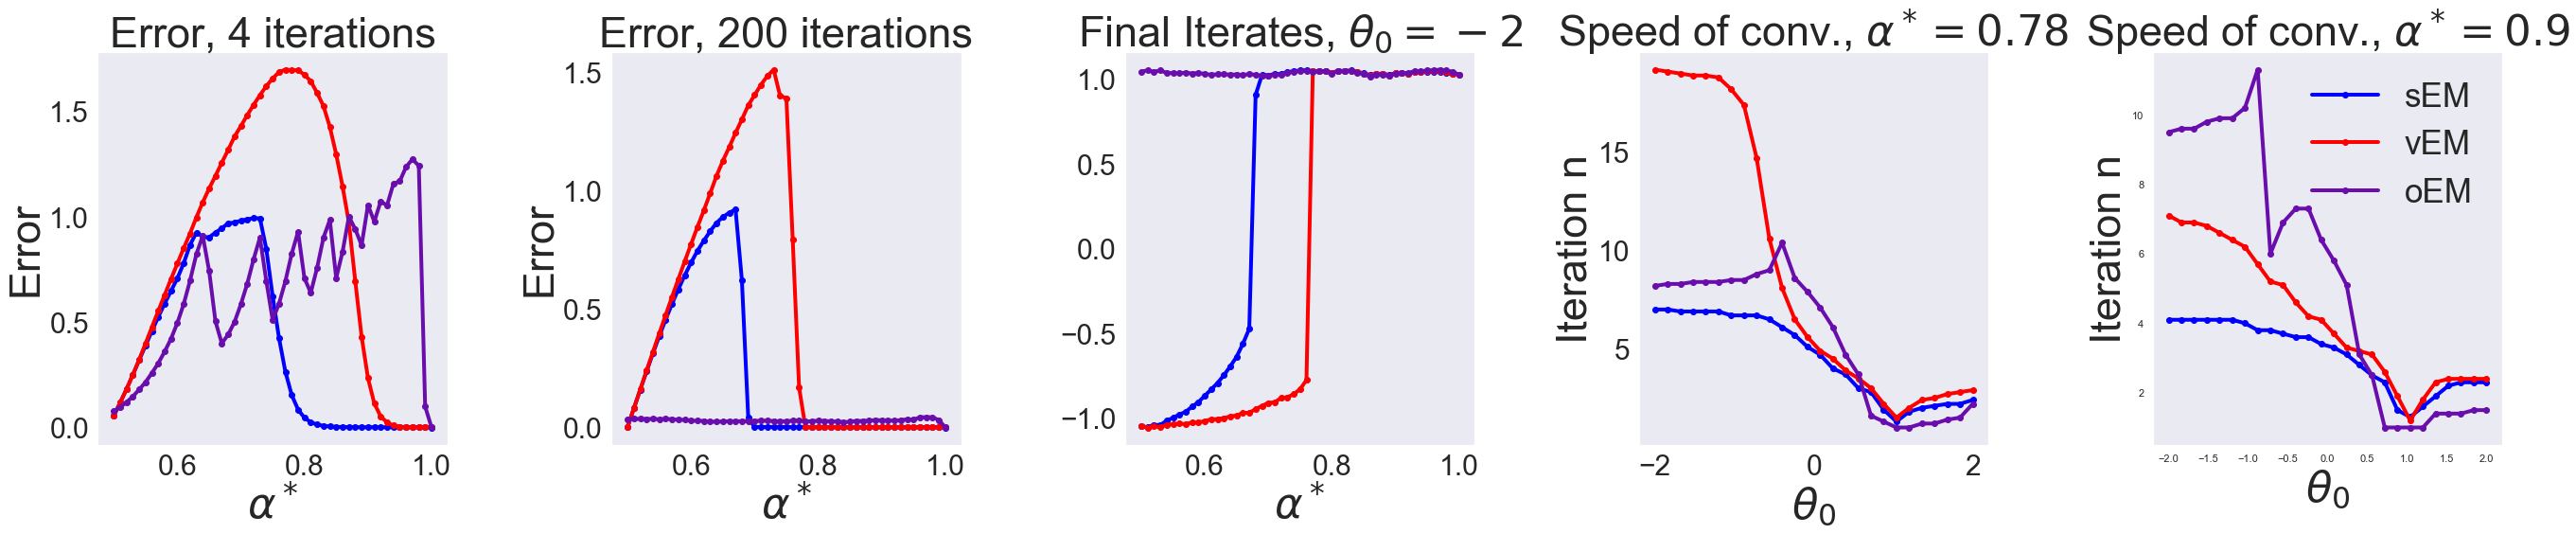

In [7]:

#Plot figure 
colors=['#6A0DAD','#DDA0DD','blue','red']


eps =1.5
d_sink = np.nan*np.zeros((len(mu0list), len(props), nrep))
d_em_theta = np.nan*np.zeros((len(mu0list), len(props), nrep))

d_em = np.nan*np.zeros((len(mu0list), len(props), nrep))
r=3
for r in range(nrep):
    for m0 in range(len(mu0list)):
        for p0 in range(len(props)):
            l=np.where(dist_sinkhorn[m0, p0, r,:]<eps*dist_sinkhorn[m0, p0, r,-1])
            if(len(l[0])>0):
                d_sink[m0,p0,r]= l[0][0]
            l=np.where(dist_em[m0, p0, r,:]<eps*dist_em[m0, p0, r,-1])
            if(len(l[0])>0):
                d_em[m0,p0,r]= l[0][0]
            l=np.where(dist_em_theta[m0, p0, r,:]<eps*dist_em_theta[m0, p0, r,-1])
            if(len(l[0])>0):
                d_em_theta[m0,p0,r]= l[0][0]
#print(d_sink[:,25])


fig,ax = plt.subplots(1,5,figsize=(38,8))

sns.set(style="dark")
print()
niters = [3,-1]
niters2 =[3, 199]
#niters_em =
for i in range(2):
    ax[i].plot(props, np.nanmean(np.nanmax(dist_sinkhorn[:,:,:,niters[i]], axis=0),axis=1),'o-', linewidth=4,c='blue')
    ax[i].plot(props, np.nanmean(np.nanmax(dist_em[:,:,:,niters[i]], axis=0), axis=1), 'o-', linewidth=4,c='red')
    ax[i].plot(props, np.nanmean(np.nanmax(dist_em_theta[:,:,:,niters[i]], axis=0), axis=1), 'o-', linewidth=4,c=colors[0])
    ax[i].set_xlabel(r'$\alpha^*$', fontsize=45)
    ax[i].set_ylabel('Error', fontsize=45)
    ax[i].set_title('Error, ' + str(niters2[i]+1) + ' iterations',fontsize=45)

mu2 = mu_final_em_theta[0,:,0,-1]*np.sign(mu_final_em_theta[0,:,0,-1])    
ax[2].set_title(r'Final Iterates, $\theta_0=-2$', fontsize=45)
ax[2].set_xlabel(r'$\alpha^*$', fontsize=45)
ax[2].plot(props,mu_final_sinkhorn[0,:,0,-1],'-o',c='blue',label='sEM',linewidth=4)
ax[2].plot(props,mu_final_em[0,:,0,-1],'-o',c='red',label='vEM', linewidth=4)
ax[2].plot(props,mu2,'-o',c=colors[0],label='oEM', linewidth=4)
    
ax[3].plot(mu0, np.nanmean(d_sink[:,28,:], axis=1)+1,'o-',linewidth=4,c='blue')
ax[3].plot(mu0, np.nanmean(d_em[:,28,:], axis=1)+1,'o-',linewidth=4,c='red')
ax[3].plot(mu0, np.nanmean(d_em_theta[:,28,:], axis=1)+1,'o-',linewidth=4,c=colors[0])
ax[3].set_ylabel('Iteration n', fontsize=45)
ax[3].set_title(r'Speed of conv., $\alpha^*=0.78$', fontsize=45)
ax[3].set_xlabel(r'$\theta_0$', fontsize=45)

ax[4].set_ylabel('Iteration n')
ax[4].plot(mu0, np.nanmean(d_sink[:,40,:], axis=1)+1,'o-',linewidth=4,c='blue')
ax[4].plot(mu0, np.nanmean(d_em[:,40,:], axis=1)+1,'o-',linewidth=4,c='red')
ax[4].plot(mu0, np.nanmean(d_em_theta[:,40,:], axis=1)+1,'o-',linewidth=4,c=colors[0])
ax[4].legend(['sEM','vEM','oEM'],fontsize=35, frameon=False)

ax[4].set_ylabel('Iteration n',fontsize=45)
ax[4].set_title(r'Speed of conv., $\alpha^*=0.9$', fontsize=45)
ax[4].set_xlabel(r'$\theta_0$', fontsize=45)

for s in range(4):
    ax[s].tick_params(axis='x', labelsize= 30) 
    ax[s].tick_params(axis='y', labelsize= 30) 
ax[3].set_yticklabels([0,5,10,15])

fig.tight_layout()
